<a href="https://colab.research.google.com/github/AlexAlexeyuk/Alexander.Alexeyuk/blob/ready/XGB_add_%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_%D0%B8_%D0%B2%D1%8B%D0%B2%D0%BE%D0%B4%D1%8B_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Цель обучения моделей: 
* Построить модель, которая смогла бы минимизировать количество назначенных антибиотиков при нулевом уровне ложноотрицательных результатов
## Задачи:
* Построить наиболее эффективные модели машинного обучения для поставленной цели
* Произвести настройку параметров
* Оценить качество моделей и соотнести качество с поставленной целью
* Реализовать принцип решения задачи "обнуления" ложноотрицательных результатов путём стэкинга моделей, по аналогии с распространённым подходом в медицине
 -- консилиум, когда если даже один оценщик считает, что антибиотики показаны - определяем как показание к антибиотикам
го исхода.

## Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu,ttest_ind, kruskal,chisquare, pearsonr, spearmanr
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
!pip install colorama
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
%matplotlib inline
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
!pip install catboost
from catboost import CatBoostClassifier
!pip install h2o
import h2o
h2o.init()
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators import H2OIsolationForestEstimator
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OSupportVectorMachineEstimator
from h2o.grid.grid_search import H2OGridSearch




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpun_blji2
  JVM stdout: /tmp/tmpun_blji2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpun_blji2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,1 month and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_mfh6xw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [37]:
df = pd.read_csv('/content/covid_data.csv')
df = df.drop('Unnamed: 0', axis=1)

In [38]:
# разделяем набор данных на тренировочную, тестовую и валидационную части и нормализуем данные
X = df.drop('Ab_ind', axis=1)  
Y = df['Ab_ind']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, stratify = Y, random_state = 42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.20, stratify = Y_train, random_state = 42)
train = X_train.copy()
test = X_test.copy()
valid = X_val.copy()
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
# т.к. есть определённые проблемы с переводом отскалированных данных в 
# H2O фрейм - данные переведены без скалирования, нормализация "прошита" в H2O
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)
valid = h2o.H2OFrame(valid)
Y = h2o.H2OFrame(Y_train.reset_index())
V = h2o.H2OFrame(Y_val.reset_index())
T = h2o.H2OFrame(Y_test.reset_index())
train['target'] = Y['Ab_ind']
valid['target'] = V['Ab_ind']
test['target'] = T['Ab_ind']

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


## Машинное обучение в H2O

# GBM

In [4]:
predictors = train.col_names
predictors.remove('target')# определяем таргет

train['target'] = train['target'].asfactor() # опрелеляем таргет как фактор
valid['target'] = valid['target'].asfactor()#опрелеляем таргет как фактор
target  = 'target'
hyperparams_tune = {
    'max_depth' : list(range(2, 6, 1)),
    'sample_rate' : [x/100. for x in range(20,101)],
    'col_sample_rate' : [x/100. for x in range(20,101)],
    'min_split_improvement': [0, 1e-8, 1e-6, 1e-4]}

search_criteria_tune = {
    'strategy' : "RandomDiscrete",
    'max_runtime_secs' : 300,  ## лимит 5 минут 
    'max_models' : 15,  ## строим не более 15 моделей
    'stopping_rounds' : 5,
    'stopping_metric' : "AUCPR", # тестировал разные варианты, AUC оказался наиболее дееспособным
    'stopping_tolerance': 1e-3}
gbm_final_grid = H2OGradientBoostingEstimator(
    ## Используем много деревьев с ранней остановкой
    ntrees = 10000,
    
    learn_rate = 0.05,
    learn_rate_annealing = 0.99,
    ## каждые 10 деревьев - оценка
    score_tree_interval = 10,
    ## рандомное семя для воспроизводимости
    seed = 12345,
    ## Баланс "прошит" в модели, надо просто постаить "True"
    balance_classes = True,
    )
final_grid = H2OGridSearch(
    gbm_final_grid,
    hyper_params = hyperparams_tune,
    search_criteria = search_criteria_tune)
final_grid.train(x = predictors,
           y = target,
           training_frame = train,
           validation_frame = valid, 
           max_runtime_secs = 180)
sorted_gbm_grid = final_grid.get_grid(sort_by = 'aucpr')
best_gbm = sorted_gbm_grid.models[0]
best_gbm_perf_valid = best_gbm.model_performance(valid)
best_gbm_perf_test = best_gbm.model_performance(test)
params_list = []
for key, value in best_gbm.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
best_gbm_perf_test  # берем наилучшую модель 

#best_gbm_perf_valid.aucpr(), best_gbm_perf_test.aucpr(), 

gbm Grid Build progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.11930307321052049
RMSE: 0.34540276954668514
LogLoss: 0.3766629585058166
Mean Per-Class Error: 0.23636363636363633
AUC: 0.8046620046620047
AUCPR: 0.42541458618949723
Gini: 0.6093240093240093

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25004458683526115: 


,,0,1,Error,Rate
0,0,125.0,18.0,0.1259,(18.0/143.0)
1,1,12.0,18.0,0.4,(12.0/30.0)
2,Total,137.0,36.0,0.1734,(30.0/173.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.250045,0.545455,35.0
1,max f2,0.126590,0.655738,62.0
2,max f0point5,0.325489,0.522388,25.0
3,max accuracy,0.325489,0.838150,25.0
4,max precision,0.616477,1.000000,0.0
5,max recall,0.048036,1.000000,134.0
6,max specificity,0.616477,1.000000,0.0
7,max absolute_mcc,0.250045,0.442192,35.0
8,max min_per_class_accuracy,0.135147,0.741259,59.0
9,max mean_per_class_accuracy,0.126590,0.763636,62.0



Gains/Lift Table: Avg response rate: 17.34 %, avg score: 14.85 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011561,0.609236,2.883333,2.883333,0.500000,0.614087,0.500000,0.614087,0.033333,0.033333,188.333333,188.333333,0.026340
1,2,0.023121,0.542954,2.883333,2.883333,0.500000,0.596516,0.500000,0.605301,0.033333,0.066667,188.333333,188.333333,0.052681
2,3,0.034682,0.485017,0.000000,1.922222,0.000000,0.487584,0.333333,0.566062,0.000000,0.066667,-100.000000,92.222222,0.038695
3,4,0.040462,0.477940,5.766667,2.471429,1.000000,0.482949,0.428571,0.554189,0.033333,0.100000,476.666667,147.142857,0.072028
4,5,0.052023,0.465968,2.883333,2.562963,0.500000,0.473606,0.444444,0.536281,0.033333,0.133333,188.333333,156.296296,0.098368
5,6,0.104046,0.378933,1.922222,2.242593,0.333333,0.413390,0.388889,0.474836,0.100000,0.233333,92.222222,124.259259,0.156410
6,7,0.150289,0.321836,5.045833,3.105128,0.875000,0.354921,0.538462,0.437939,0.233333,0.466667,404.583333,210.512821,0.382751
7,8,0.202312,0.251786,1.922222,2.800952,0.333333,0.278055,0.485714,0.396826,0.100000,0.566667,92.222222,180.095238,0.440793
8,9,0.300578,0.171187,1.696078,2.439744,0.294118,0.204386,0.423077,0.333913,0.166667,0.733333,69.607843,143.974359,0.523543
9,10,0.398844,0.117019,0.678431,2.005797,0.117647,0.138170,0.347826,0.285687,0.066667,0.800000,-32.156863,100.579710,0.485315


Что ж, результат нельзя сказать, что впечатляющий: 9 ложноотрицательных значений

In [5]:
h2o_GM_model_prediction_test = final_grid[0].predict(test)
h2o_GM_model_prediction_test = h2o.h2o.as_list(h2o_GM_model_prediction_test, 
                                               use_pandas=True)

gbm prediction progress: |████████████████████████████████████████████████| 100%


# XGBoost

In [6]:

from h2o.estimators import H2OXGBoostEstimator

In [7]:
xgboost_params = {
    'tree_method': ['exact', 'approx', 'hist'],
    'max_depth': [1, 5, 9, 13, 17, 21, 25]
    , 'ntrees': [5000]
     , 'learn_rate': [1, 0.1, 0.01, 0.001]
     , 'sample_rate': [0.8]
      , 'col_sample_rate': [0.8]
     , 'stopping_metric': "AUCPR"
    , 'stopping_rounds': [5]
    , 'stopping_tolerance': [0.001]
                 }



xgb_final_grid = H2OXGBoostEstimator(



    score_tree_interval = 10,
    seed = 12345

    )
final_grid = H2OGridSearch(
    xgb_final_grid,
    hyper_params = xgboost_params,
    search_criteria = search_criteria_tune)
final_grid.train(x = predictors,
           y = target,
           training_frame = train,
           validation_frame = valid) # can override setting in search_criteria_tune
sorted_xgb_grid = final_grid.get_grid(sort_by = 'aucpr')
best_xgb = sorted_xgb_grid.models[0]
best_xgb_perf_valid = best_xgb.model_performance(valid)
best_xgb_perf_test = best_xgb.model_performance(test)
params_list = []
for key, value in best_xgb.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
best_xgb_perf_test


xgboost Grid Build progress: |████████████████████████████████████████████| 100%

ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.15221655798105102
RMSE: 0.3901494046913964
LogLoss: 0.570457496734981
Mean Per-Class Error: 0.28100233100233096
AUC: 0.7403263403263403
AUCPR: 0.334418410977349
Gini: 0.4806526806526805

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.04403432458639145: 


,,0,1,Error,Rate
0,0,96.0,47.0,0.3287,(47.0/143.0)
1,1,7.0,23.0,0.2333,(7.0/30.0)
2,Total,103.0,70.0,0.3121,(54.0/173.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.044034,0.460000,69.0
1,max f2,0.027876,0.606061,77.0
2,max f0point5,0.560836,0.454545,19.0
3,max accuracy,0.560836,0.826590,19.0
4,max precision,0.560836,0.500000,19.0
5,max recall,0.000114,1.000000,168.0
6,max specificity,0.972596,0.993007,0.0
7,max absolute_mcc,0.044034,0.337855,69.0
8,max min_per_class_accuracy,0.074159,0.700000,61.0
9,max mean_per_class_accuracy,0.044034,0.718998,69.0



Gains/Lift Table: Avg response rate: 17.34 %, avg score: 16.28 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011561,0.964568,0.000000,0.000000,0.000000,0.971550,0.000000,0.971550,0.000000,0.000000,-100.000000,-100.000000,-0.013986
1,2,0.023121,0.949681,2.883333,1.441667,0.500000,0.961354,0.250000,0.966452,0.033333,0.033333,188.333333,44.166667,0.012354
2,3,0.034682,0.930065,2.883333,1.922222,0.500000,0.935203,0.333333,0.956036,0.033333,0.066667,188.333333,92.222222,0.038695
3,4,0.040462,0.892094,5.766667,2.471429,1.000000,0.907146,0.428571,0.949052,0.033333,0.100000,476.666667,147.142857,0.072028
4,5,0.052023,0.846222,0.000000,1.922222,0.000000,0.888961,0.333333,0.935698,0.000000,0.100000,-100.000000,92.222222,0.058042
5,6,0.104046,0.565760,3.203704,2.562963,0.555556,0.675854,0.444444,0.805776,0.166667,0.266667,220.370370,156.296296,0.196737
6,7,0.150289,0.463707,2.162500,2.439744,0.375000,0.518529,0.423077,0.717392,0.100000,0.366667,116.250000,143.974359,0.261772
7,8,0.202312,0.293509,1.922222,2.306667,0.333333,0.377362,0.400000,0.629956,0.100000,0.466667,92.222222,130.666667,0.319814
8,9,0.300578,0.126942,1.017647,1.885256,0.176471,0.217365,0.326923,0.495070,0.100000,0.566667,1.764706,88.525641,0.321911
9,10,0.398844,0.044431,1.696078,1.838647,0.294118,0.080086,0.318841,0.392828,0.166667,0.733333,69.607843,83.864734,0.404662


2 ложноотрицательных значения! Отличное исполнение!

In [8]:
h2o_XGB_model_prediction_test = final_grid[0].predict(test)
h2o_XGB_model_prediction_test = h2o.h2o.as_list(h2o_XGB_model_prediction_test, use_pandas=True)

xgboost prediction progress: |████████████████████████████████████████████| 100%


# RandomForest

In [9]:
 hyperparams_tune = {
    'max_depth' : list(range(2, 6, 1)),
    'sample_rate' : [x/100. for x in range(20,101)],
    'min_split_improvement': [0, 1e-8, 1e-6, 1e-4]}

search_criteria_tune = {
    'strategy' : "RandomDiscrete",
    'max_runtime_secs' : 300,
    'max_models' : 15,  
    'stopping_rounds' : 5,
    'stopping_metric' : "AUCPR",
    'stopping_tolerance': 1e-3}
drf_final_grid = H2ORandomForestEstimator(
    ntrees = 10000,
    score_tree_interval = 10,
    seed = 12345,
    balance_classes = True)
final_grid = H2OGridSearch(
    drf_final_grid,
    hyper_params = hyperparams_tune,
    search_criteria = search_criteria_tune)
final_grid.train(x = predictors,
           y = target,
           training_frame = train,
           validation_frame = valid, 
           max_runtime_secs = 180) # can override setting in search_criteria_tune
sorted_drf_grid = final_grid.get_grid(sort_by = 'aucpr')
best_drf = sorted_drf_grid.models[0]
best_drf_perf_valid = best_drf.model_performance(valid)
best_drf_perf_test = best_drf.model_performance(test)
params_list = []
for key, value in best_drf.params.items():
    params_list.append(str(key)+" = "+str(value['actual']))
best_drf_perf_test#best_drf_perf_valid.aucpr(), best_drf_perf_test.aucpr(), params_list

drf Grid Build progress: |████████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.12499381908377567
RMSE: 0.3535446493496623
LogLoss: 0.39677759094835413
Mean Per-Class Error: 0.2731934731934732
AUC: 0.7839160839160839
AUCPR: 0.41564124149049253
Gini: 0.5678321678321678

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.25539918701967634: 


,,0,1,Error,Rate
0,0,132.0,11.0,0.0769,(11.0/143.0)
1,1,15.0,15.0,0.5,(15.0/30.0)
2,Total,147.0,26.0,0.1503,(26.0/173.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.255399,0.535714,25.0
1,max f2,0.090769,0.619048,89.0
2,max f0point5,0.255399,0.559701,25.0
3,max accuracy,0.255399,0.849711,25.0
4,max precision,0.502311,1.000000,0.0
5,max recall,0.062948,1.000000,138.0
6,max specificity,0.502311,1.000000,0.0
7,max absolute_mcc,0.255399,0.448232,25.0
8,max min_per_class_accuracy,0.125971,0.720280,61.0
9,max mean_per_class_accuracy,0.125971,0.726807,61.0



Gains/Lift Table: Avg response rate: 17.34 %, avg score: 13.61 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011561,0.477196,2.883333,2.883333,0.500000,0.491260,0.500000,0.491260,0.033333,0.033333,188.333333,188.333333,0.026340
1,2,0.023121,0.447355,2.883333,2.883333,0.500000,0.473866,0.500000,0.482563,0.033333,0.066667,188.333333,188.333333,0.052681
2,3,0.034682,0.408771,0.000000,1.922222,0.000000,0.412627,0.333333,0.459251,0.000000,0.066667,-100.000000,92.222222,0.038695
3,4,0.040462,0.402033,0.000000,1.647619,0.000000,0.408144,0.285714,0.451950,0.000000,0.066667,-100.000000,64.761905,0.031702
4,5,0.052023,0.361877,2.883333,1.922222,0.500000,0.382878,0.333333,0.436601,0.033333,0.100000,188.333333,92.222222,0.058042
5,6,0.104046,0.303278,3.844444,2.883333,0.666667,0.328024,0.500000,0.382312,0.200000,0.300000,284.444444,188.333333,0.237063
6,7,0.150289,0.243120,4.325000,3.326923,0.750000,0.274709,0.576923,0.349203,0.200000,0.500000,332.500000,232.692308,0.423077
7,8,0.202312,0.198893,0.000000,2.471429,0.000000,0.216172,0.428571,0.314995,0.000000,0.500000,-100.000000,147.142857,0.360140
8,9,0.300578,0.139374,1.356863,2.107051,0.235294,0.162753,0.365385,0.265224,0.133333,0.633333,35.686275,110.705128,0.402564
9,10,0.398844,0.118598,1.017647,1.838647,0.176471,0.128711,0.318841,0.231590,0.100000,0.733333,1.764706,83.864734,0.404662


15 ложноотрицательных предсказаний случайного леса

In [10]:
h2o_RF_model_prediction_test = final_grid[0].predict(test)
h2o_RF_model_prediction_test = h2o.h2o.as_list(h2o_RF_model_prediction_test, use_pandas=True)

drf prediction progress: |████████████████████████████████████████████████| 100%


## Определение других оценщиков ( SVM, LogRegr, CatBoost, LGB)

In [11]:
def all_estimators(X_train, X_test, Y_train, Y_test):
  """Функция - все оценщики

  На вход подаются уже отскалированные данные: тренировочная и тестовая  подвыборки.

  На выходе - словарь с предсказаниями на тестовой выборке
  
  """
  # подбор параметров происходил при помощи GridSearch с кросс-валидацией
  log_reg = LogisticRegression(C=5, 
                             tol=0.001,  
                             solver = 'sag', 
                             class_weight = {0:.99, 1:16},
                             max_iter=200,
                             random_state=123,
                             n_jobs=-1
                             )
  log_reg.fit(X_train, Y_train)
  log_reg_pred_test = log_reg.predict(X_test)
  # подбор параметров происходил при помощи GridSearch с кросс-валидацией
  sv_clf = SVC(C=10, 
             gamma=0.001, 
             kernel='rbf', 
             class_weight={0:1, 1:11},
             random_state=123
            )
  sv_clf.fit(X_train, Y_train)
  sv_clf_pred_test = sv_clf.predict(X_test)


  model = CatBoostClassifier(
    eval_metric='F1',
    random_seed=63,
    iterations=200,
    learning_rate=0.03,
    class_weights = {0:1, 1:66}
    )
  model.fit(
    X_train, Y_train,
    
    verbose=False,
    plot=True
    )
  cat_pred_test = model.predict(data=X_test)


  # подбор параметров осуществлялся при помощи библиотеки FLAML
  lg=LGBMClassifier(colsample_bytree=0.9901173566841761, learning_rate=1.0,
               max_bin=511, min_child_weight=0.9842705371351147,
               n_estimators=19, num_leaves=8, objective='binary',
               reg_alpha=4.5697209030862906e-06,
               reg_lambda=0.19094909947197827, class_weight = {0:.02, 1:3.8}
    )
  lg.fit(X_train,Y_train)
  ypred_test = lg.predict(X_test)


  all_pred_test = {'Logistic': log_reg_pred_test, "SVM": sv_clf_pred_test,
                   "CatBoost": cat_pred_test, "LGBM": ypred_test,
                   "Actual_labels": Y_test
                   }

  return all_pred_test

In [12]:
test_matrix = all_estimators(X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [13]:
test_matrix

{'Actual_labels': 687    1
 737    0
 155    1
 538    0
 542    0
       ..
 318    0
 285    0
 372    1
 669    0
 365    1
 Name: Ab_ind, Length: 173, dtype: int64,
 'CatBoost': array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]),
 'LGBM': array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
    

In [14]:
# формируем матрицу предсказаний моделей
test_matrix = pd.DataFrame(test_matrix)

In [15]:
# обновляем индексы,чтобы не было  проблем с дальнейшей склейкой столбцов
test_matrix = test_matrix.reset_index()

In [16]:
#добавляем оценщиков к общим матрицам оценок
test_matrix['h2o_XGB'] = h2o_XGB_model_prediction_test['predict']
test_matrix['h2o_GBM'] = h2o_GM_model_prediction_test['predict']
test_matrix['h2o_RF'] = h2o_RF_model_prediction_test['predict']
test_matrix = test_matrix.drop(["Actual_labels", 'index'], axis=1)
Y_test = Y_test.reset_index()
test_matrix['Actual_labels'] = Y_test["Ab_ind"]

In [17]:
pd.options.display.max_rows = 999
test_matrix[test_matrix['Actual_labels'] == 1]

,Logistic,SVM,CatBoost,LGBM,h2o_XGB,h2o_GBM,h2o_RF,Actual_labels
0,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,1
9,0,0,1,0,0,1,0,1
19,1,1,1,1,1,1,0,1
21,1,1,1,1,1,1,1,1
22,1,1,1,1,1,1,1,1
26,1,1,1,1,1,1,1,1
27,1,1,1,1,0,0,0,1
29,1,1,1,1,1,1,1,1
38,1,1,1,1,1,1,1,1


Следует обратить внимание, что есть запись, где ни одна модель не определила показание к АБ-терапии, что плохо, учитывая цель - 0 ложноотрицательных значений

In [18]:
def plot_cm(labels, predictions, p=0.5):
  """Функция матрица несоответствий.

  На вход - реальные таргеты и предсказанные
  На выходе матрица несоответствий
  """
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Legitimate Transactions Detected (True Negatives):  35
Legitimate Transactions Incorrectly Detected (False Positives):  108
Fraudulent Transactions Missed (False Negatives):  1
Fraudulent Transactions Detected (True Positives):  29
Total Fraudulent Transactions:  30


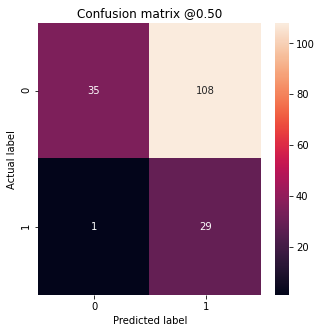

In [19]:
test_matrix['STACK'] = (test_matrix['Logistic'] + 
                        test_matrix['SVM'] +
                        test_matrix['CatBoost'] +
                        test_matrix['LGBM'] +
                        test_matrix['h2o_XGB'] +
                        test_matrix['h2o_GBM'] +
                        test_matrix['h2o_RF'] )
# Определил признак "Стэк", если он больше или равен 1 = 1, иначе = 0
test_matrix['STACK'] = test_matrix['STACK'].map(lambda 
                                                x: x + 1 - x 
                                                if x >= 1
                                                else 0)
plot_cm(test_matrix['Actual_labels'], test_matrix['STACK'])



---


## Глубокое обучение

In [40]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
cleaned_df = df.copy()
val_features = np.array(X_val) # определяем все параметры и лейблы 
test_features = np.array(X_test)# как массивы, для более удобной работы
train_labels = np.array(Y_train)
val_labels = np.array(Y_val)
test_labels = np.array(Y_test)
train_features = np.array(X_train)
bool_train_labels = train_labels != 0
train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (552,)
Validation labels shape: (138,)
Test labels shape: (173,)
Training features shape: (552, 24)
Validation features shape: (138, 24)
Test features shape: (173, 24)


In [41]:
METRICS = [ # определяем все метрики
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]
# определяем структуру нейронной сети
def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          22, activation='relu', # активатор - релу
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', # валидационная площадь под РОК-кривой как критерий ранней остановки
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)
model = make_model()
model.summary()
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 22)                550       
_________________________________________________________________
dropout_8 (Dropout)          (None, 22)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 23        
Total params: 573
Trainable params: 573
Non-trainable params: 0
_________________________________________________________________
Loss: 0.5866


In [42]:
neg, pos = np.bincount(df['Ab_ind'])
initial_bias = np.log([pos/neg])
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

Loss: 0.4794


In [43]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [44]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

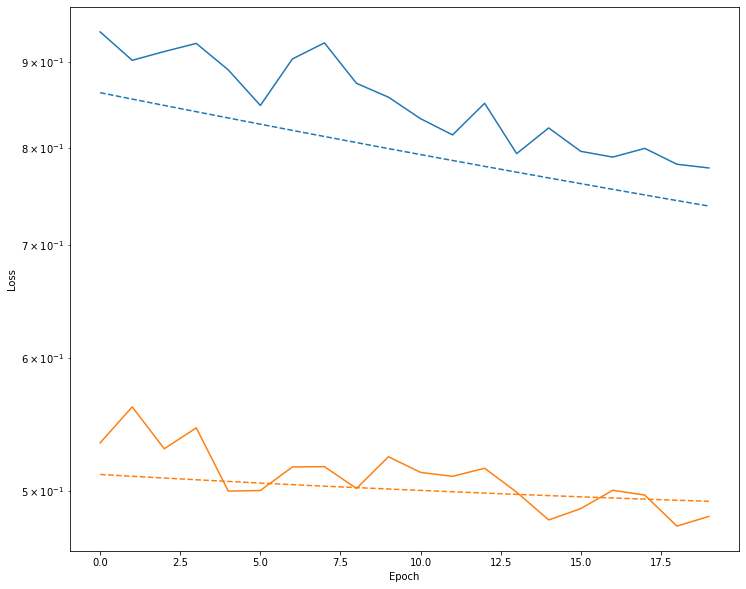

In [45]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')


plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [46]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.5400 - tp: 17.0000 - fp: 62.0000 - tn: 510.0000 - fn: 101.0000 - accuracy: 0.7638 - precision: 0.2152 - recall: 0.1441 - auc: 0.5592 - val_loss: 0.5113 - val_tp: 2.0000 - val_fp: 5.0000 - val_tn: 109.0000 - val_fn: 22.0000 - val_accuracy: 0.8043 - val_precision: 0.2857 - val_recall: 0.0833 - val_auc: 0.5031
Epoch 2/100
1/1 [==============================] - 0s 66ms/step - loss: 0.5160 - tp: 7.0000 - fp: 31.0000 - tn: 427.0000 - fn: 87.0000 - accuracy: 0.7862 - precision: 0.1842 - recall: 0.0745 - auc: 0.5349 - val_loss: 0.5101 - val_tp: 2.0000 - val_fp: 5.0000 - val_tn: 109.0000 - val_fn: 22.0000 - val_accuracy: 0.8043 - val_precision: 0.2857 - val_recall: 0.0833 - val_auc: 0.5022
Epoch 3/100
1/1 [==============================] - 0s 63ms/step - loss: 0.5573 - tp: 12.0000 - fp: 47.0000 - tn: 411.0000 - fn: 82.0000 - accuracy: 0.7663 - precision: 0.2034 - recall: 0.1277 - auc: 0.5102 - val_loss: 0.5089 - val_tp: 2.0

In [50]:
def plot_metrics(history):
  # определяем построение графиков обучения
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [51]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

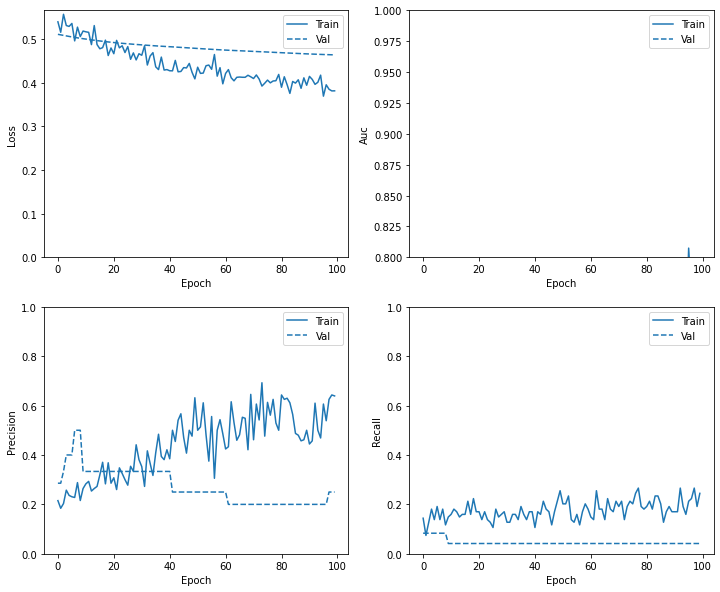

In [52]:
plot_metrics(baseline_history)

In [53]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.402260959148407
tp :  6.0
fp :  7.0
tn :  136.0
fn :  24.0
accuracy :  0.8208092451095581
precision :  0.4615384638309479
recall :  0.20000000298023224
auc :  0.7292541265487671

Legitimate Transactions Detected (True Negatives):  136
Legitimate Transactions Incorrectly Detected (False Positives):  7
Fraudulent Transactions Missed (False Negatives):  24
Fraudulent Transactions Detected (True Positives):  6
Total Fraudulent Transactions:  30


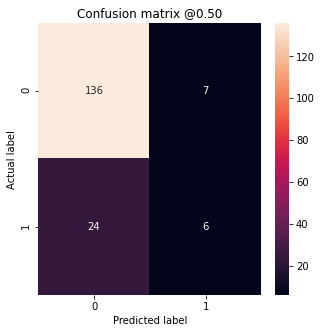

In [54]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

Итого, первое приближение. Т.к. имеет место дисбаланс в таргете, стандартные настройки работают не так как хотелось бы

In [55]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

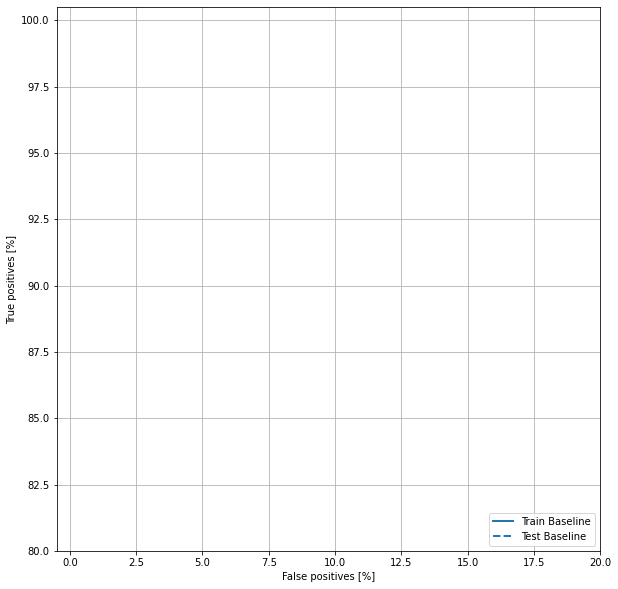

In [56]:
import sklearn
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [57]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
neg, pos = np.bincount(df['Ab_ind'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

Examples:
    Total: 863
    Positive: 148 (17.15% of total)



In [58]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # определил веса. Экспериментировал с разными вариантами, но
    # сначительно снизить количество ложнонеративных значений менее 6 не удалось
    class_weight=class_weight) 

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.8930 - tp: 26.0000 - fp: 53.0000 - tn: 548.0000 - fn: 98.0000 - accuracy: 0.7917 - precision: 0.3291 - recall: 0.2097 - auc: 0.5995 - val_loss: 0.5129 - val_tp: 3.0000 - val_fp: 5.0000 - val_tn: 109.0000 - val_fn: 21.0000 - val_accuracy: 0.8116 - val_precision: 0.3750 - val_recall: 0.1250 - val_auc: 0.5029
Epoch 2/100
1/1 [==============================] - 0s 64ms/step - loss: 0.8287 - tp: 26.0000 - fp: 53.0000 - tn: 405.0000 - fn: 68.0000 - accuracy: 0.7808 - precision: 0.3291 - recall: 0.2766 - auc: 0.6009 - val_loss: 0.5131 - val_tp: 3.0000 - val_fp: 5.0000 - val_tn: 109.0000 - val_fn: 21.0000 - val_accuracy: 0.8116 - val_precision: 0.3750 - val_recall: 0.1250 - val_auc: 0.5088
Epoch 3/100
1/1 [==============================] - 0s 63ms/step - loss: 0.8755 - tp: 16.0000 - fp: 45.0000 - tn: 413.0000 - fn: 78.0000 - accuracy: 0.7772 - precision: 0.2623 - recall: 0.1702 - auc: 0.5643 - val_loss: 0.5135 - val_tp: 3.0

loss :  0.5747551918029785
tp :  20.0
fp :  32.0
tn :  111.0
fn :  10.0
accuracy :  0.7572254538536072
precision :  0.38461539149284363
recall :  0.6666666865348816
auc :  0.7618881464004517

Legitimate Transactions Detected (True Negatives):  111
Legitimate Transactions Incorrectly Detected (False Positives):  32
Fraudulent Transactions Missed (False Negatives):  10
Fraudulent Transactions Detected (True Positives):  20
Total Fraudulent Transactions:  30


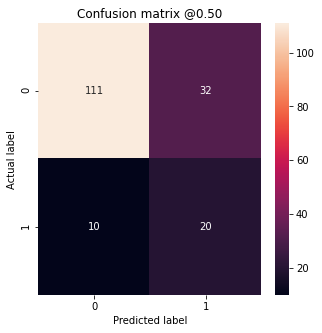

In [59]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

Модель с весами классов даёт неплохой результат, но всё ещё очень большая ошибка - 9

In [60]:
# чтобы попытаться улучшить модель, попробуем использовать бустрап-подход, а именно:
# уже существующие признаки случайным образом перенаберём, тем самым, позволим
# "лучше" нейронной сети понять закономерности взаимосвязи таргетного значения с признаками
bool_train_labels = train_labels != 0
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]
pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))
res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)
order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]
resampled_features.shape

(916, 24)

In [61]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [62]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], 
                                                         weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [63]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.8011 - tp: 707.0000 - fp: 667.0000 - tn: 506.0000 - fn: 341.0000 - accuracy: 0.5462 - precision: 0.5146 - recall: 0.6746 - auc: 0.5725 - val_loss: 0.8662 - val_tp: 15.0000 - val_fp: 75.0000 - val_tn: 39.0000 - val_fn: 9.0000 - val_accuracy: 0.3913 - val_precision: 0.1667 - val_recall: 0.6250 - val_auc: 0.5038
Epoch 2/100
1/1 [==============================] - 0s 79ms/step - loss: 0.7872 - tp: 704.0000 - fp: 668.0000 - tn: 355.0000 - fn: 321.0000 - accuracy: 0.5171 - precision: 0.5131 - recall: 0.6868 - auc: 0.5436 - val_loss: 0.8619 - val_tp: 15.0000 - val_fp: 75.0000 - val_tn: 39.0000 - val_fn: 9.0000 - val_accuracy: 0.3913 - val_precision: 0.1667 - val_recall: 0.6250 - val_auc: 0.5046
Epoch 3/100
1/1 [==============================] - 0s 79ms/step - loss: 0.7882 - tp: 716.0000 - fp: 612.0000 - tn: 369.0000 - fn: 351.0000 - accuracy: 0.5298 - precision: 0.5392 - recall: 0.6710 - auc: 0.5413 - val_loss: 0.8581 - va

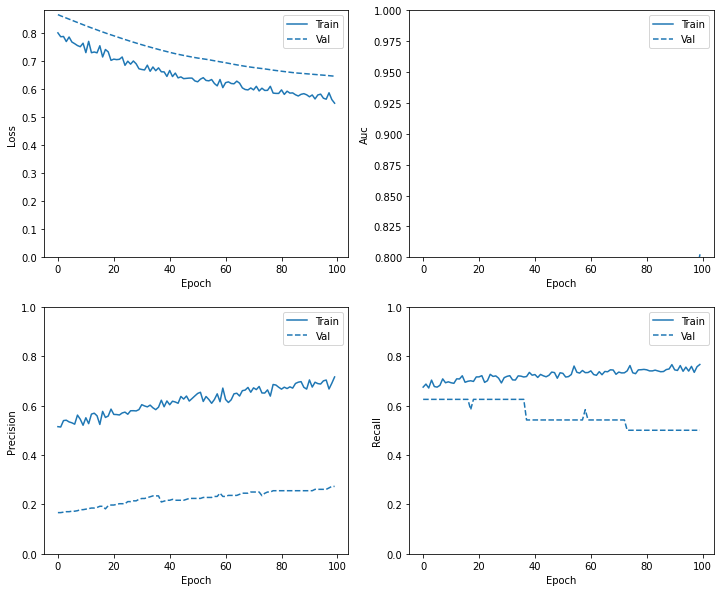

In [64]:
plot_metrics(resampled_history)

Epoch 1/1000
20/20 [==============================] - 3s 75ms/step - loss: 2.3459 - tp: 8273.6190 - fp: 7545.0000 - tn: 3903.0952 - fn: 2881.7619 - accuracy: 0.5343 - precision: 0.5178 - recall: 0.7277 - auc: 0.5678 - val_loss: 0.9922 - val_tp: 20.0000 - val_fp: 87.0000 - val_tn: 27.0000 - val_fn: 4.0000 - val_accuracy: 0.3406 - val_precision: 0.1869 - val_recall: 0.8333 - val_auc: 0.5565
Epoch 2/1000
20/20 [==============================] - 1s 28ms/step - loss: 1.8606 - tp: 9551.7619 - fp: 8231.4286 - tn: 3103.1429 - fn: 1544.1429 - accuracy: 0.5636 - precision: 0.5374 - recall: 0.8534 - auc: 0.6480 - val_loss: 1.1146 - val_tp: 23.0000 - val_fp: 99.0000 - val_tn: 15.0000 - val_fn: 1.0000 - val_accuracy: 0.2754 - val_precision: 0.1885 - val_recall: 0.9583 - val_auc: 0.6058
Epoch 3/1000
20/20 [==============================] - 1s 28ms/step - loss: 1.6023 - tp: 10350.0476 - fp: 8611.0476 - tn: 2533.6190 - fn: 935.7619 - accuracy: 0.5730 - precision: 0.5444 - recall: 0.9136 - auc: 0.6990 

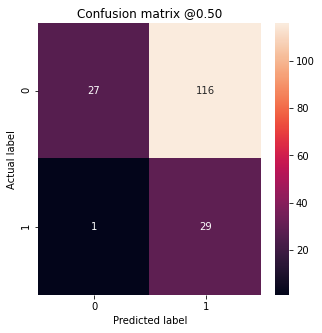

In [79]:
tf.random.set_seed(1234)
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds),
    class_weight={0:1, 1:6.9} # хотя и бустрап выборка в какой-то мере
    # сбалансирована, т.к. мы хотим нулевой уровень ложноотр.результата - 
    #определяем веса классов
    )

train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(np.array(X_test), batch_size=BATCH_SIZE)
valid_predictions_resampled = resampled_model.predict(np.array(X_val), batch_size=BATCH_SIZE)
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

Нейронные сети - лидер обучения - 100% чувствительность) и отличный recall (специфичность)

In [74]:
test_predictions_resampled = resampled_model.predict(np.array(X_test), 
                                                     batch_size=BATCH_SIZE)

In [75]:
test_predictions_resampled = list(map(lambda x: 
                                      np.round(x +.5) if x >=.5  # определение порога "перехода" к лейблу 1
                                      else x, test_predictions_resampled))

In [76]:
# определил предсказанное значение как признак
test_matrix['Neural_net'] = test_predictions_resampled 

## Стекинг моделей

Legitimate Transactions Detected (True Negatives):  23
Legitimate Transactions Incorrectly Detected (False Positives):  120
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  30
Total Fraudulent Transactions:  30


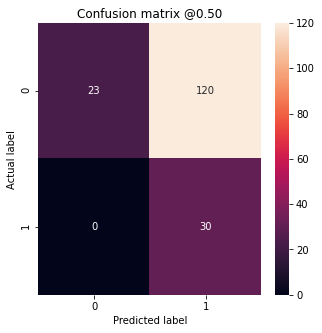

In [77]:
test_matrix['STACK'] = (test_matrix['Logistic'] + 
                        test_matrix['SVM'] +
                        test_matrix['CatBoost'] +
                        test_matrix['LGBM'] +
                        test_matrix['h2o_XGB'] +
                        test_matrix['h2o_GBM'] +
                        test_matrix['h2o_RF'] +
                        test_matrix['Neural_net'])
# Определил признак "Стэк", если он больше или равен 1 = 1, иначе = 0
test_matrix['STACK'] = test_matrix['STACK'].map(lambda 
                                                x: x + 1 - x 
                                                if x >= 1
                                                else 0)
plot_cm(Y_test, test_matrix['STACK'])

In [70]:
test_matrix[test_matrix['Actual_labels'] == 1]

,Logistic,SVM,CatBoost,LGBM,h2o_XGB,h2o_GBM,h2o_RF,Actual_labels,STACK,Neural_net
0,1,1,1,1,1,1,1,1,[1.0],[1.0]
2,0,0,0,0,0,0,0,1,0,[0.47690648]
9,0,0,1,0,0,1,0,1,[1.0],[0.2853969]
19,1,1,1,1,1,1,0,1,[1.0],[1.0]
21,1,1,1,1,1,1,1,1,[1.0],[1.0]
22,1,1,1,1,1,1,1,1,[1.0],[1.0]
26,1,1,1,1,1,1,1,1,[1.0],[1.0]
27,1,1,1,1,0,0,0,1,[1.0],[1.0]
29,1,1,1,1,1,1,1,1,[1.0],[1.0]
38,1,1,1,1,1,1,1,1,[1.0],[1.0]


## Итог:


*   Целевой показатель ложнонегативное предсказание равен 0, что являлось принципиальным условием. Достичь удалось на бустрап-нейронной сети и стекинге
*   Лучшая модель способна снизить назначение антибиотиков с 95 % ( изначально) до 63 %, что очень неплохо.
* Поставленная цель достигнута при помощи глубокого обучения, чтобы улучшить модель необходимо больше данных
* Стекинг моделей может в какой-то мере улучшить предсказания, однако, в моём случае, модели обучения не смогли определить один случай необходимости АБ-терапии




